In [ ]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

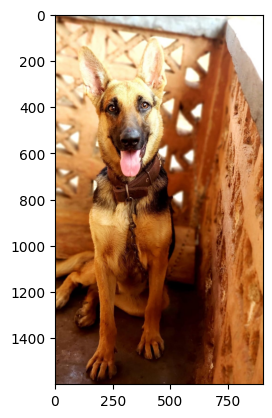

In [ ]:
## Find closest centroids

image = plt.imread('/content/WhatsApp Image 2025-12-16 at 9.30.01 PM.jpeg')

plt.imshow(image)
plt.show()

In [ ]:
##check the dimension of the image

print("shape of the image", image.shape)

shape of the image (1600, 900, 3)


In [ ]:
### preprocess image
"""
Convert the image to a 2 dimensional image
"""
image = image/255


X_img = np.reshape(image, (image.shape[0] * image.shape[1], 3))

In [ ]:
# You do not need to modify this part

def kMeans_init_centroids(X, K):
    """
    This function initializes K centroids that are to be
    used in K-Means on the dataset X

    Args:
        X (ndarray): Data points
        K (int):     number of centroids/clusters

    Returns:
        centroids (ndarray): Initialized centroids
    """

    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])

    # Take the first K examples as centroids
    centroids = X[randidx[:K]]

    return centroids

In [ ]:
def compute_centroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the
    data points assigned to each centroid.
    """

    # Useful variables
    m, n = X.shape

    # You need to return the following variables correctly
    centroids = np.zeros((K, n))

    ### START CODE HERE ###
    for k in range(K):
        points = X[idx == k]
        centroids[k] = np.mean(points, axis=0)

    ### END CODE HERE ##

    return centroids

In [ ]:
def find_closest_centroids(X, centroids):
    """
    Computes the centroid memberships for every example
    """

    # Set K
    K = centroids.shape[0]

    # You need to return the following variables correctly
    idx = np.zeros(X.shape[0], dtype=int)

    ### START CODE HERE ###
    for i in range(X.shape[0]):
            ## array to hold distance between X[i] and each centroids[j]
            distance = []
            for j in range(centroids.shape[0]):
                norm_ij = np.linalg.norm(X[i] - centroids[j])
                distance.append(norm_ij)

            idx[i] = np.argmin(distance)

     ### END CODE HERE ###

    return idx

In [ ]:
def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
    """
    Runs the K-Means algorithm on data matrix X, where each row of X
    is a single example
    """

    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros(m)
    plt.figure(figsize=(8, 6))

    # Run K-Means
    for i in range(max_iters):

        #Output progress
        print("K-Means iteration %d/%d" % (i, max_iters-1))

        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)

        # Optionally plot progress
        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids

        # Given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, K)
    plt.show()
    return centroids, idx

In [ ]:
""" Implementing K-means algorithm """

K = 16
max_iters = 10

initial_centroid = kMeans_init_centroids(X_img, K)

## run kMeans
centroids, idx = run_kMeans(X_img, initial_centroid, max_iters)

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


<Figure size 800x600 with 0 Axes>

In [ ]:
print("Shape of idx:", idx.shape)
print("Closest centroid for the first five elements:", idx[:5])

Shape of idx: (1440000,)
Closest centroid for the first five elements: [13 13 13 13 13]


In [ ]:
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
def plot_kMeans_RGB(X, centroids, idx, K):
    # Plot the colors and centroids in a 3D space
    fig = plt.figure(figsize=(16, 16))
    ax = fig.add_subplot(221, projection='3d')
    ax.scatter(*X.T*255, zdir='z', depthshade=False, s=.3, c=X)
    ax.scatter(*centroids.T*255, zdir='z', depthshade=False, s=500, c='red', marker='x', lw=3)
    ax.set_xlabel('R value - Redness')
    ax.set_ylabel('G value - Greenness')
    ax.set_zlabel('B value - Blueness')
    # ax.w_yaxis.set_pane_color((0., 0., 0., .2))
    ax.yaxis.set_pane_color((0., 0., 0., .2))
    ax.set_title("Original colors and their color clusters' centroids")
    plt.show()

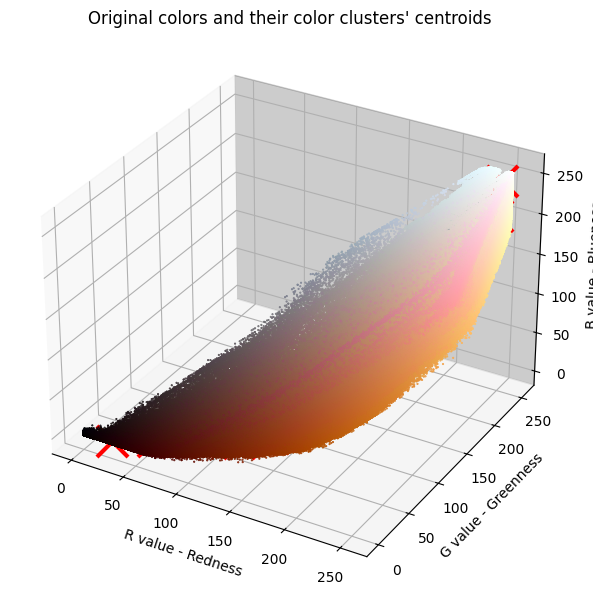

In [ ]:
plot_kMeans_RGB(X_img, centroids, idx, K)

In [ ]:
def show_centroid_colors(centroids):
    palette = np.expand_dims(centroids, axis=0)
    num = np.arange(0,len(centroids))
    plt.figure(figsize=(16, 16))
    plt.xticks(num)
    plt.yticks([])
    plt.imshow(palette)


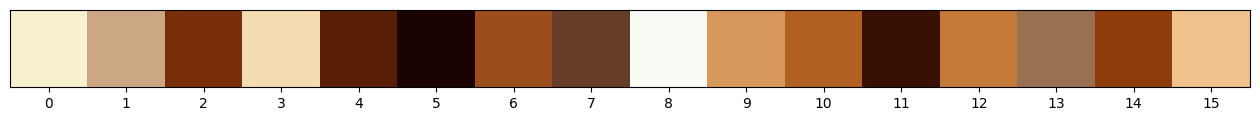

In [ ]:
# Visualize the 16 colors selected
show_centroid_colors(centroids)

In [ ]:
#### Compress the image

# Find the closest centroid of each pixel
idx = find_closest_centroids(X_img, centroids)

# Replace each pixel with the color of the closest centroid
X_recovered = centroids[idx, :]

# Reshape image into proper dimensions
X_recovered = np.reshape(X_recovered, image.shape)

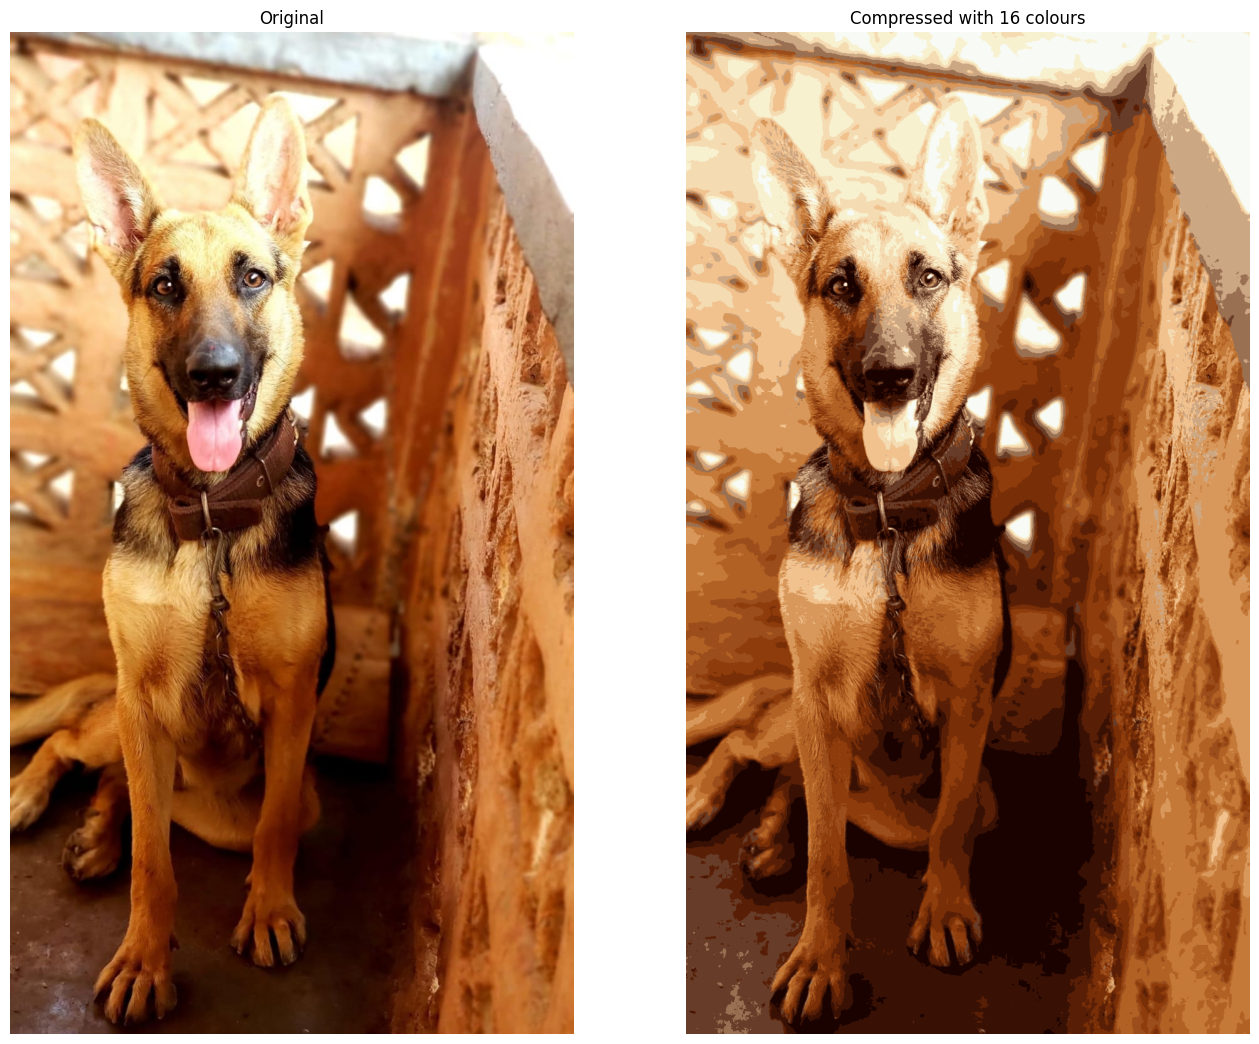

In [ ]:
# Display original image
fig, ax = plt.subplots(1,2, figsize=(16,16))
plt.axis('off')

ax[0].imshow(image)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(X_recovered)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()

This is my dog who passed away in 2020 and this is one of my favorite photo of her. I noticed the colorful (rich) the colors were and used it to build a quick K-means image compression.

I applied K-means to reduce the number of colors by clustering pixels in RGB color and replacing each pixel with its cluster’s centroid color. I initialized the centroids, then iteratively assigned pixels to the nearest centroid and recomputed the centroids until convergence. In the end, I compressed the image using the most 16 colors while preserving the overall look.